In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import time
import glob
%matplotlib inline

In [4]:
ca = pd.read_csv('C:\\Users\\omerw\\Desktop\\youtube\\Data\\cavideos.csv')

In [5]:
with open('C:\\Users\\omerw\\Desktop\\youtube\\Data\\CA_category_id.json') as f:
    categories = json.load(f)['items']

In [6]:
category_name = {}
for category in categories:
    category_name[int(category['id'])] = category['snippet']['title']
ca['category_name'] = ca['category_id'].map(category_name)

In [7]:
print(category_name)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [8]:
ca['description'].fillna(value='None',inplace=True)

In [9]:
ca['publish_time'] = pd.to_datetime(ca['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')

In [10]:
ca['publish_month'] = ca['publish_time'].dt.month

In [11]:
ca['trending_date'] = pd.to_datetime(ca['trending_date'],format = '%y.%d.%m')
ca['trending_month'] = ca['trending_date'].dt.month

In [12]:
like_percent = pd.DataFrame((ca['likes'] / ca['views']) * 100)
dislike_percent = pd.DataFrame((ca['dislikes'] / ca['views']) * 100)
ca['like_percent'] = like_percent
ca['dislike_percent'] = dislike_percent

In [13]:
ca['positive_or_negative'] = ca['like_percent'] > ca['dislike_percent']

In [14]:
# comparing the likes to dislikes 
video_feel = []
for item in ca['positive_or_negative']:
    if item == True:
        video_feel.append(1)
    else:
        video_feel.append(0)

In [15]:
ca['positive_or_negative'] = video_feel

In [16]:

ca = ca[['video_id','trending_date','trending_month','title','channel_title',
        'category_id','category_name','publish_time','publish_month','views','positive_or_negative',
        'likes','like_percent','dislikes','dislike_percent','comment_count','thumbnail_link','comments_disabled',
        'ratings_disabled','video_error_or_removed','description']]

In [20]:
corr_list = ca[['views','likes','dislikes','comment_count']]

In [27]:
ca[['hours','minutes','seconds']] = ca['publish_time'].dt.time.astype(str).str.split(':', expand=True)

In [31]:
ca.head(1)

,video_id,trending_date,trending_month,title,channel_title,category_id,category_name,publish_time,publish_month,views,...,dislike_percent,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,hours,minutes,seconds
0,n1WpP7iowLc,2017-11-14,11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10 17:00:03,11,17158579,...,0.253051,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,17,00,03


In [32]:
ca.describe()

,trending_month,category_id,publish_month,views,positive_or_negative,likes,like_percent,dislikes,dislike_percent,comment_count
count,40881.000000,40881.000000,40881.000000,4.088100e+04,40881.000000,4.088100e+04,40881.000000,4.088100e+04,40881.000000,4.088100e+04
mean,5.234143,20.795553,5.273183,1.147036e+06,0.986424,3.958269e+04,3.341188,2.009195e+03,0.132381,5.042975e+03
std,3.826237,6.775054,3.852069,3.390913e+06,0.115724,1.326895e+05,3.077632,1.900837e+04,0.321985,2.157902e+04
min,1.000000,1.000000,1.000000,7.330000e+02,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,20.000000,2.000000,1.439020e+05,1.000000,2.191000e+03,0.939988,9.900000e+01,0.049934,4.170000e+02
50%,4.000000,24.000000,4.000000,3.712040e+05,1.000000,8.780000e+03,2.512198,3.030000e+02,0.080368,1.301000e+03
75%,6.000000,24.000000,6.000000,9.633020e+05,1.000000,2.871700e+04,4.823377,9.500000e+02,0.135348,3.713000e+03
max,12.000000,43.000000,12.000000,1.378431e+08,1.000000,5.053338e+06,45.050857,1.602383e+06,21.558033,1.114800e+06


In [33]:
ca.columns
# our x & y
# the y will be -> likes
# the x will be -> trending month, publish month, views, disklikes, and comment_count

Index(['video_id', 'trending_date', 'trending_month', 'title', 'channel_title',
       'category_id', 'category_name', 'publish_time', 'publish_month',
       'views', 'positive_or_negative', 'likes', 'like_percent', 'dislikes',
       'dislike_percent', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'hours', 'minutes', 'seconds'],
      dtype='object')

In [35]:
df = ca[['category_id','trending_date','trending_month','publish_time','publish_month','category_id','views','likes','dislikes',
         'positive_or_negative','comment_count']]

In [36]:
df['views_log'] = np.log(df['views'])
df['likes_log'] = np.log(df['likes'])
df['dislikes_log'] = np.log(df['dislikes'])
df['comment_count_log'] = np.log(df['comment_count'])

<ipython-input-36-1bb809b22f8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['views_log'] = np.log(df['views'])
C:\Users\omerw\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-36-1bb809b22f8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['likes_log'] = np.log(df['likes'])
<ipython-input-36-1bb809b22f8d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [37]:
df.head()

,category_id,trending_date,trending_month,publish_time,publish_month,category_id,views,likes,dislikes,positive_or_negative,comment_count,views_log,likes_log,dislikes_log,comment_count_log
0,10,2017-11-14,11,2017-11-10 17:00:03,11,10,17158579,787425,43420,1,125882,16.658009,13.576523,10.678675,11.743100
1,23,2017-11-14,11,2017-11-13 17:00:00,11,23,1014651,127794,1688,1,13030,13.830055,11.758175,7.431300,9.475010
2,23,2017-11-14,11,2017-11-12 19:05:24,11,23,3191434,146035,5339,1,8181,14.975981,11.891602,8.582794,9.009570
3,24,2017-11-14,11,2017-11-12 18:01:41,11,24,2095828,132239,1989,1,17518,14.555459,11.792366,7.595387,9.770984
4,10,2017-11-14,11,2017-11-09 11:04:14,11,10,33523622,1634130,21082,1,85067,17.327761,14.306621,9.956175,11.351194


In [40]:
X = df[['trending_month','publish_month','category_id','positive_or_negative',
        'views','dislikes','comment_count']]
y = df['likes']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()

In [45]:
fit_model = lm.fit(X_train,y_train)

In [46]:
X_train.columns

Index(['trending_month', 'publish_month', 'category_id', 'category_id',
       'positive_or_negative', 'views', 'dislikes', 'comment_count'],
      dtype='object')

In [47]:
cdf = pd.DataFrame(lm.coef_,index = X_train.columns,columns=['Coefficients'])
cdf

,Coefficients
trending_month,356.976322
publish_month,-73.031530
category_id,-333.501868
category_id,-333.501868
positive_or_negative,17514.083770
views,0.020028
dislikes,-1.697622
comment_count,3.958167


In [48]:
predictions = lm.predict(X_test)

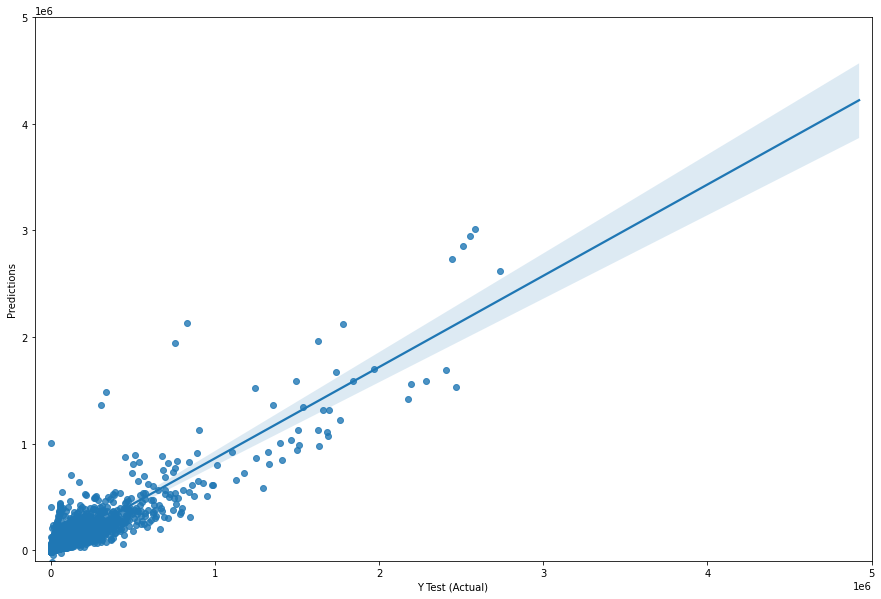

In [49]:
plt.figure(figsize=(15,10))
g = sns.regplot(y_test,predictions,fit_reg=True)
plt.xlabel('Y Test (Actual)')
plt.ylabel('Predictions')
g.set(xlim=(-100000,5000000),ylim=(-100000,5000000))
plt.show(g)